## Analyze Biodiversity data from National Parks Service

Here are questions to answer:
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?

This project idea and data is part of of Data Scientist Machine Learning Engineer Career Path provided by [Codecademy](https://www.codecademy.com).

Load python modules

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load data

In [5]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

## Scoping

* ### Observations

In [6]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [31]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [32]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [19]:
print(f"observations shape:\n{observations.shape}\n")
print(f"observations unique:\n{observations.nunique()}\n")

observations shape:
(23296, 3)

observations unique:
scientific_name    5541
park_name             4
observations        304
dtype: int64



Here we have:
* 5541 unique observation scientific_names
* 4 unique park names

In [28]:
for column in observations.columns:
    print(f"number of unique {column}:{observations[column].nunique()}")
    print(f"unique {column}:{observations[column].unique()}\n")

number of unique scientific_name:5541
unique scientific_name:['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

number of unique park_name:4
unique park_name:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

number of unique observations:304
unique observations:[ 68  77 138  84  85 112 228  39 168 250 103 114 101 279  72  65 143 165
 150  80  83 109 158 167 135 247  73 261 177 117  79  96 140 116 239 262
  71 176 148  76 235 283  25 246  64 281  88  67 254 152 147 213 265 107
 156  47 157  89 154 127 106  75  36 137 244  63 214  92 108  54 105 115
  98 223  82  90 218  58  59  48 208  95  70 100  49  56 134  91  86 136
 257 123 263 118 258 252  27  74  94 132  57 282 110 253 267 230 124 131
 164 260 119 233 245  60 151  66 206 189 242 111 120 243 276 237  29 220
 266 166  53 240  55 215 125  99 199 128 232 251 269 163  93 241 122  69
  97 14

And there is 3314739 observations in this dataset

In [29]:
observations.observations.sum()

3314739

* ### Species

In [30]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


scientific_name    object
park_name          object
observations        int64
dtype: object

In [25]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
species_info.info()
species_info.describe()
species_info.count()
species_info.isnull().sum()
species_info.nunique()
species_info.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [8]:
duplicates = observations.duplicated()
duplicates.sum()

15

In [9]:
observations.drop_duplicates(subset=None, keep='first', inplace=False)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [10]:
duplicates = species_info.duplicated()
duplicates.sum()

0

In [11]:
def missing_data(df, column):
    maxRows = df[column].count()
    print('% missing data')
    print((1 - df.count() / maxRows) * 100)


In [12]:
missing_data(observations, observations.columns[0])

% missing data
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64


In [13]:
missing_data(species_info, species_info.columns[0])

% missing data
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


In [ ]:
observations[['scientific_name']].groupby('park_name').count()

,scientific_name
park_name,
Bryce National Park,5824
Great Smoky Mountains National Park,5824
Yellowstone National Park,5824
Yosemite National Park,5824


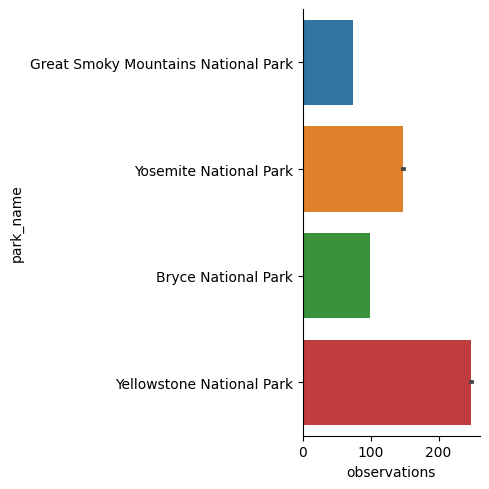

In [15]:
sns.catplot(
    data=observations, kind='bar',
    x='observations', y='park_name'
)

In [16]:
species_info['conservation_status'].nunique()

4

<AxesSubplot: xlabel='conservation_status', ylabel='Count'>

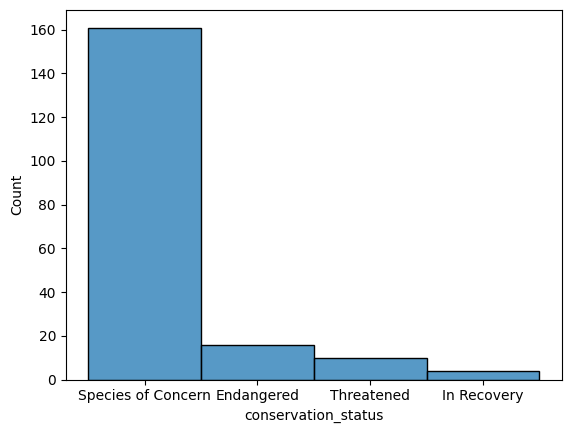

In [17]:
sns.histplot(
    species_info['conservation_status']
)

In [18]:
species_endangered = species_info.loc[species_info['conservation_status'] == 'Endangered']
species_of_concern = species_info.loc[species_info['conservation_status'] == 'Species of Concern']
species_threatened = species_info.loc[species_info['conservation_status'] == 'Threatened']
species_in_recovery = species_info.loc[species_info['conservation_status'] == 'In Recovery']

In [19]:
print(species_endangered)

            category               scientific_name  \
8             Mammal                   Canis lupus   
9             Mammal                   Canis rufus   
34            Mammal             Myotis grisescens   
39            Mammal                Myotis sodalis   
72            Mammal  Glaucomys sabrinus coloratus   
173             Bird                Grus americana   
276             Bird           Vermivora bachmanii   
343             Bird             Picoides borealis   
540             Fish          Etheostoma percnurum   
570             Fish               Noturus baileyi   
2497  Vascular Plant                 Geum radiatum   
3275            Fish             Chasmistes liorus   
4446          Mammal       Ovis canadensis sierrae   
4448          Mammal                   Canis lupus   
4505            Bird       Gymnogyps californianus   
4601       Amphibian                  Rana sierrae   

                                           common_names conservation_status  
8  

<AxesSubplot: xlabel='category', ylabel='Count'>

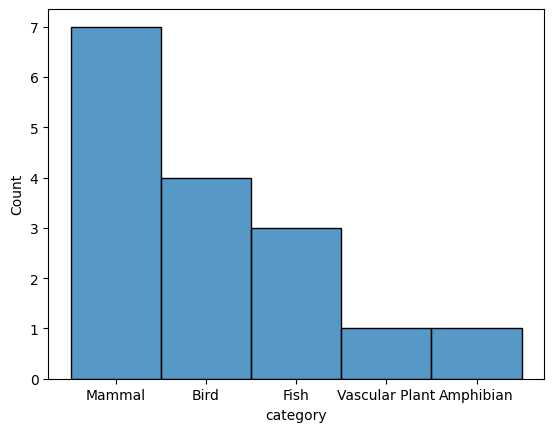

In [20]:
sns.histplot(species_endangered['category'], bins=20)

<AxesSubplot: xlabel='category', ylabel='Count'>

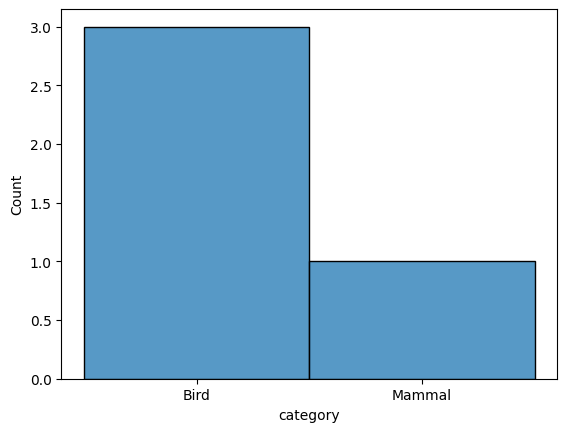

In [21]:
sns.histplot(species_in_recovery['category'], bins=20)

Text(0.5, 1.0, 'Species of concern')

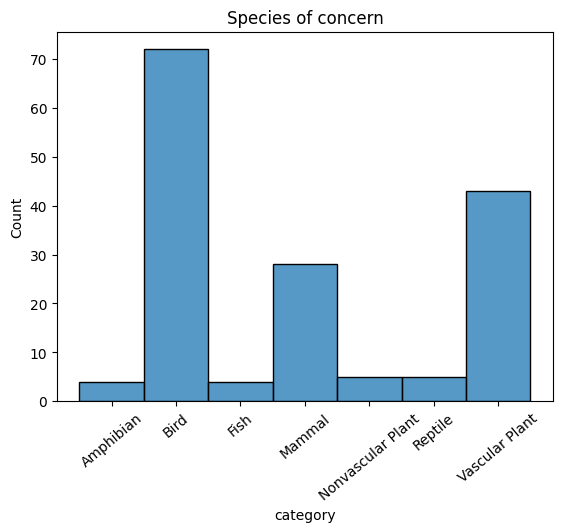

In [22]:
sns.histplot(species_of_concern['category'].sort_values(), bins=20)
plt.xticks(rotation=40)
plt.title('Species of concern')

<AxesSubplot: xlabel='category', ylabel='Count'>

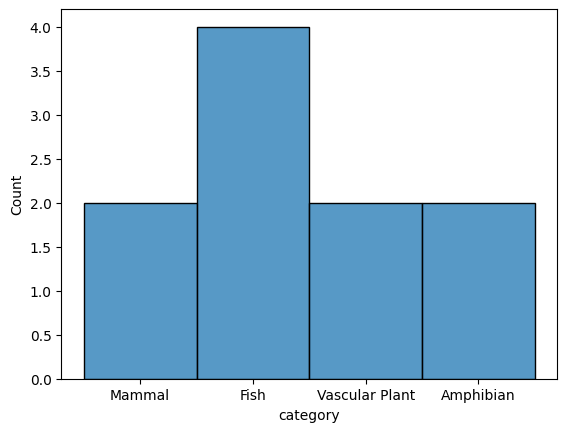

In [23]:
sns.histplot(species_threatened['category'], bins=20)

In [40]:
cond_plot = sns.FacetGrid(data=species_info, col='category', col_wrap=4)
cond_plot.map(sns.scatterplot, 'conservation_status', 'common_names')

C:\Users\adria\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 143 (\x8f) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\adria\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


C:\Users\adria\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 143 (\x8f) missing from current font.
  func(*args, **kwargs)
C:\Users\adria\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
